In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/notebooks/results_gz-cosmos-2025-05-08.csv')
df

subject_id  probability_at_least_20pc_featured  \
0        108636953                              0.9805   
1        108636980                              0.1595   
2        108636987                              0.0055   
3        108636995                              0.0035   
4        108636998                              0.0016   
...            ...                                 ...   
304608   109025079                              0.1744   
304609   109025080                              0.6278   
304610   109025081                              0.0485   
304611   109025082                              0.8047   
304612   109025083                              0.2013   

        smooth-or-featured-cd_smooth_prediction  \
0                                     22.344999   
1                                     26.243999   
2                                      2.241000   
3                                     33.981998   
4                                     19.733999   
...                                         ...   
304608                                18.079000   
304609                                22.757000   
304610                                 6.544000   
304611                                 7.152000   
304612                                11.240000   

        smooth-or-featured-cd_featured-or-disk_prediction  \
0                                                  13.595   
1                                                   6.081   
2                                                   1.266   
3                                                   4.712   
4                                                   2.467   
...                                                   ...   
304608                                              5.083   
304609                                              9.205   
304610                                              3.447   
304611                                              6.227   
304612                                              4.393   

        smooth-or-featured-cd_problem_prediction  
0                                       3.566000  
1                                       9.257000  
2                                      23.691999  
3                                      20.780001  
4                                      22.695000  
...                                          ...  
304608                                 11.699000  
304609                                  8.900000  
304610                                 23.639999  
304611                                  8.560000  
304612                                 13.924000  

[304613 rows x 5 columns]

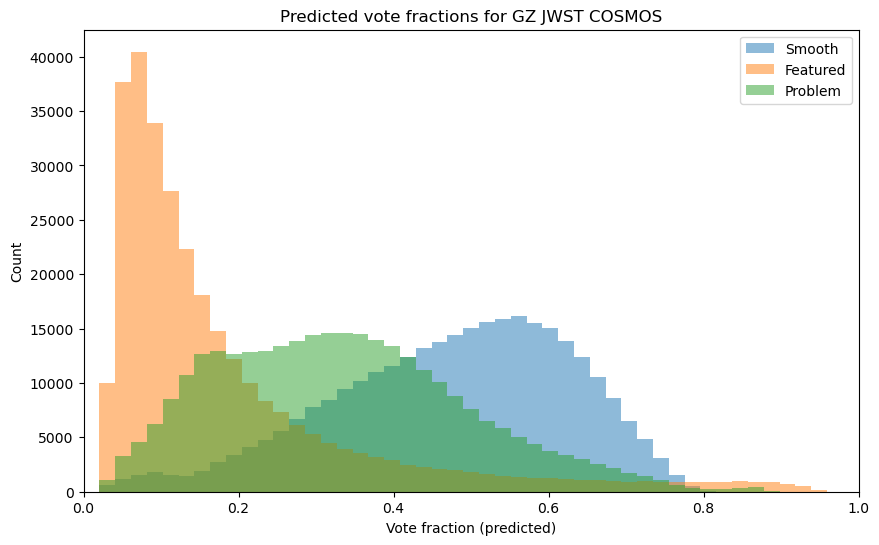

In [4]:
pred_cols = [col for col in df.columns if 'pred' in col]
df['pred_sum'] = df[pred_cols].sum(axis=1)

for col in pred_cols:
    df[col.replace('_prediction', '_fraction')] = df[col] / df['pred_sum']

fig, ax = plt.subplots(figsize=(10, 6))

bins = np.linspace(0, 1, 50)
ax.hist(df['smooth-or-featured-cd_smooth_fraction'], bins=bins, alpha=0.5, label='Smooth')
ax.hist(df['smooth-or-featured-cd_featured-or-disk_fraction'], bins=bins, alpha=0.5, label='Featured')
ax.hist(df['smooth-or-featured-cd_problem_fraction'], bins=bins, alpha=0.5, label='Problem')

ax.set_xlim([0, 1])
ax.set_xlabel('Vote fraction (predicted)')
ax.set_ylabel('Count')

ax.set_title('Predicted vote fractions for GZ JWST COSMOS')

ax.legend()

Text(0.5, 1.0, 'Vote fractions for GZ JWST COSMOS')

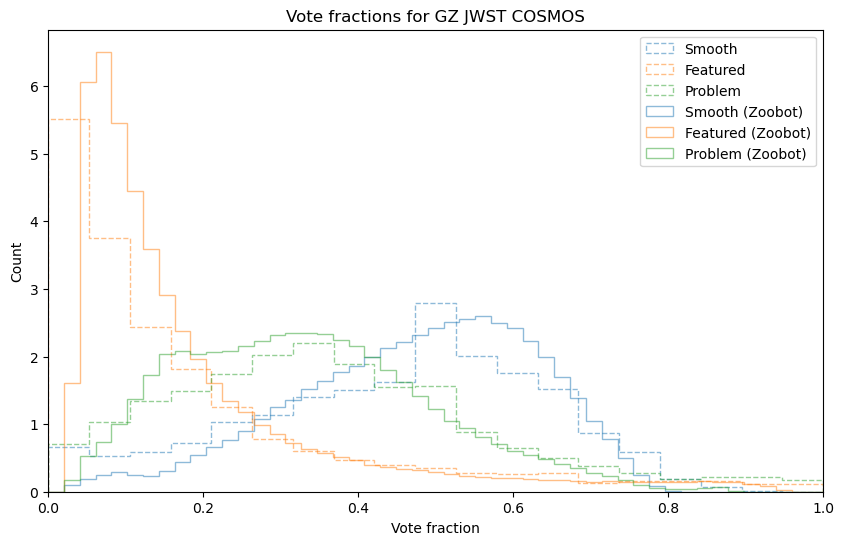

In [5]:
vol = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/jwst_cosmos/jwst-cosmos_reduced_votes.csv')

fig, ax = plt.subplots(figsize=(10, 6))

# get matplotlib color cycle

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

bins = np.linspace(0, 1, 20)
ax.hist(vol['smooth-or-featured_smooth_fraction'], bins=bins, alpha=0.5, label='Smooth', histtype='step', density=True, color=colors[0], linestyle='--')
ax.hist(vol['smooth-or-featured_featured-or-disk_fraction'], bins=bins, alpha=0.5, label='Featured', histtype='step', density=True, color=colors[1], linestyle='--')
ax.hist(vol['smooth-or-featured_star-artifact-zoom_fraction'], bins=bins, alpha=0.5, label='Problem', histtype='step', density=True, color=colors[2], linestyle='--')

bins = np.linspace(0, 1, 50)
ax.hist(df['smooth-or-featured-cd_smooth_fraction'], bins=bins, alpha=0.5, label='Smooth (Zoobot)', histtype='step', density=True, color=colors[0])
ax.hist(df['smooth-or-featured-cd_featured-or-disk_fraction'], bins=bins, alpha=0.5, label='Featured (Zoobot)', histtype='step', density=True, color=colors[1])
ax.hist(df['smooth-or-featured-cd_problem_fraction'], bins=bins, alpha=0.5, label='Problem (Zoobot)', histtype='step', density=True, color=colors[2])

ax.legend()

ax.set_xlabel('Vote fraction')
ax.set_ylabel('Count')

ax.set_xlim([0, 1])

ax.set_title('Vote fractions for GZ JWST COSMOS')

In [6]:
high_problem = vol['smooth-or-featured_star-artifact-zoom_fraction'] > 0.5


vol['url_first_frame']


0       https://panoptes-uploads.zooniverse.org/subjec...
1       https://panoptes-uploads.zooniverse.org/subjec...
2       https://panoptes-uploads.zooniverse.org/subjec...
3       https://panoptes-uploads.zooniverse.org/subjec...
4       https://panoptes-uploads.zooniverse.org/subjec...
                              ...                        
4705    https://panoptes-uploads.zooniverse.org/subjec...
4706    https://panoptes-uploads.zooniverse.org/subjec...
4707    https://panoptes-uploads.zooniverse.org/subjec...
4708    https://panoptes-uploads.zooniverse.org/subjec...
4709    https://panoptes-uploads.zooniverse.org/subjec...
Name: url_first_frame, Length: 4710, dtype: object

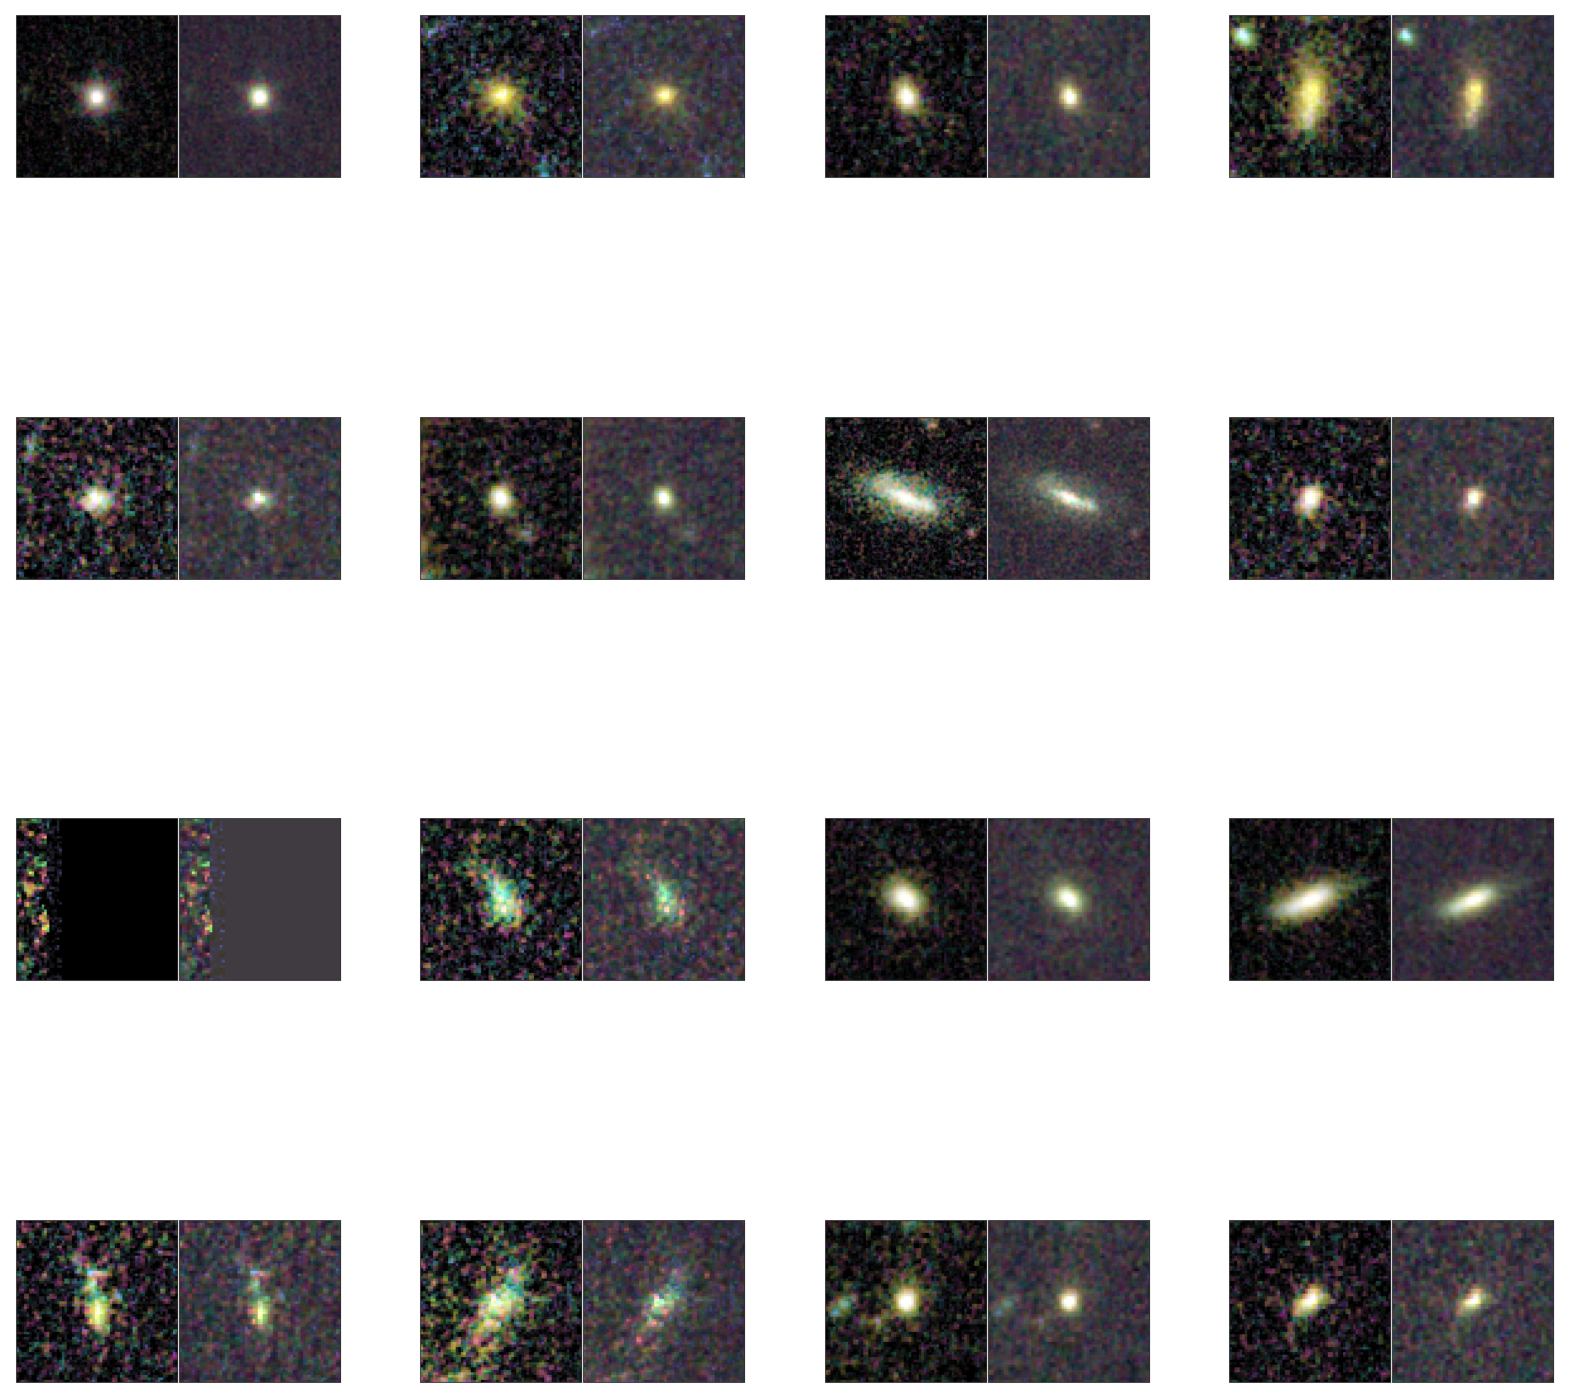

In [7]:
# create grid of 4x4 subplots

def show_examples(df):

    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    axs = axs.flatten()

    import requests
    from PIL import Image
    from io import BytesIO

    for i, ax in enumerate(axs):
        if i >= len(df):
            break
        url = df['url_first_frame'].iloc[i]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        ax.imshow(img)
        # ax.set_title(f'ID: {df["zooniverse_id"].iloc[i]}')
        ax.axis('off')

    return fig, axs



fig, axs = show_examples(vol.sample(16))

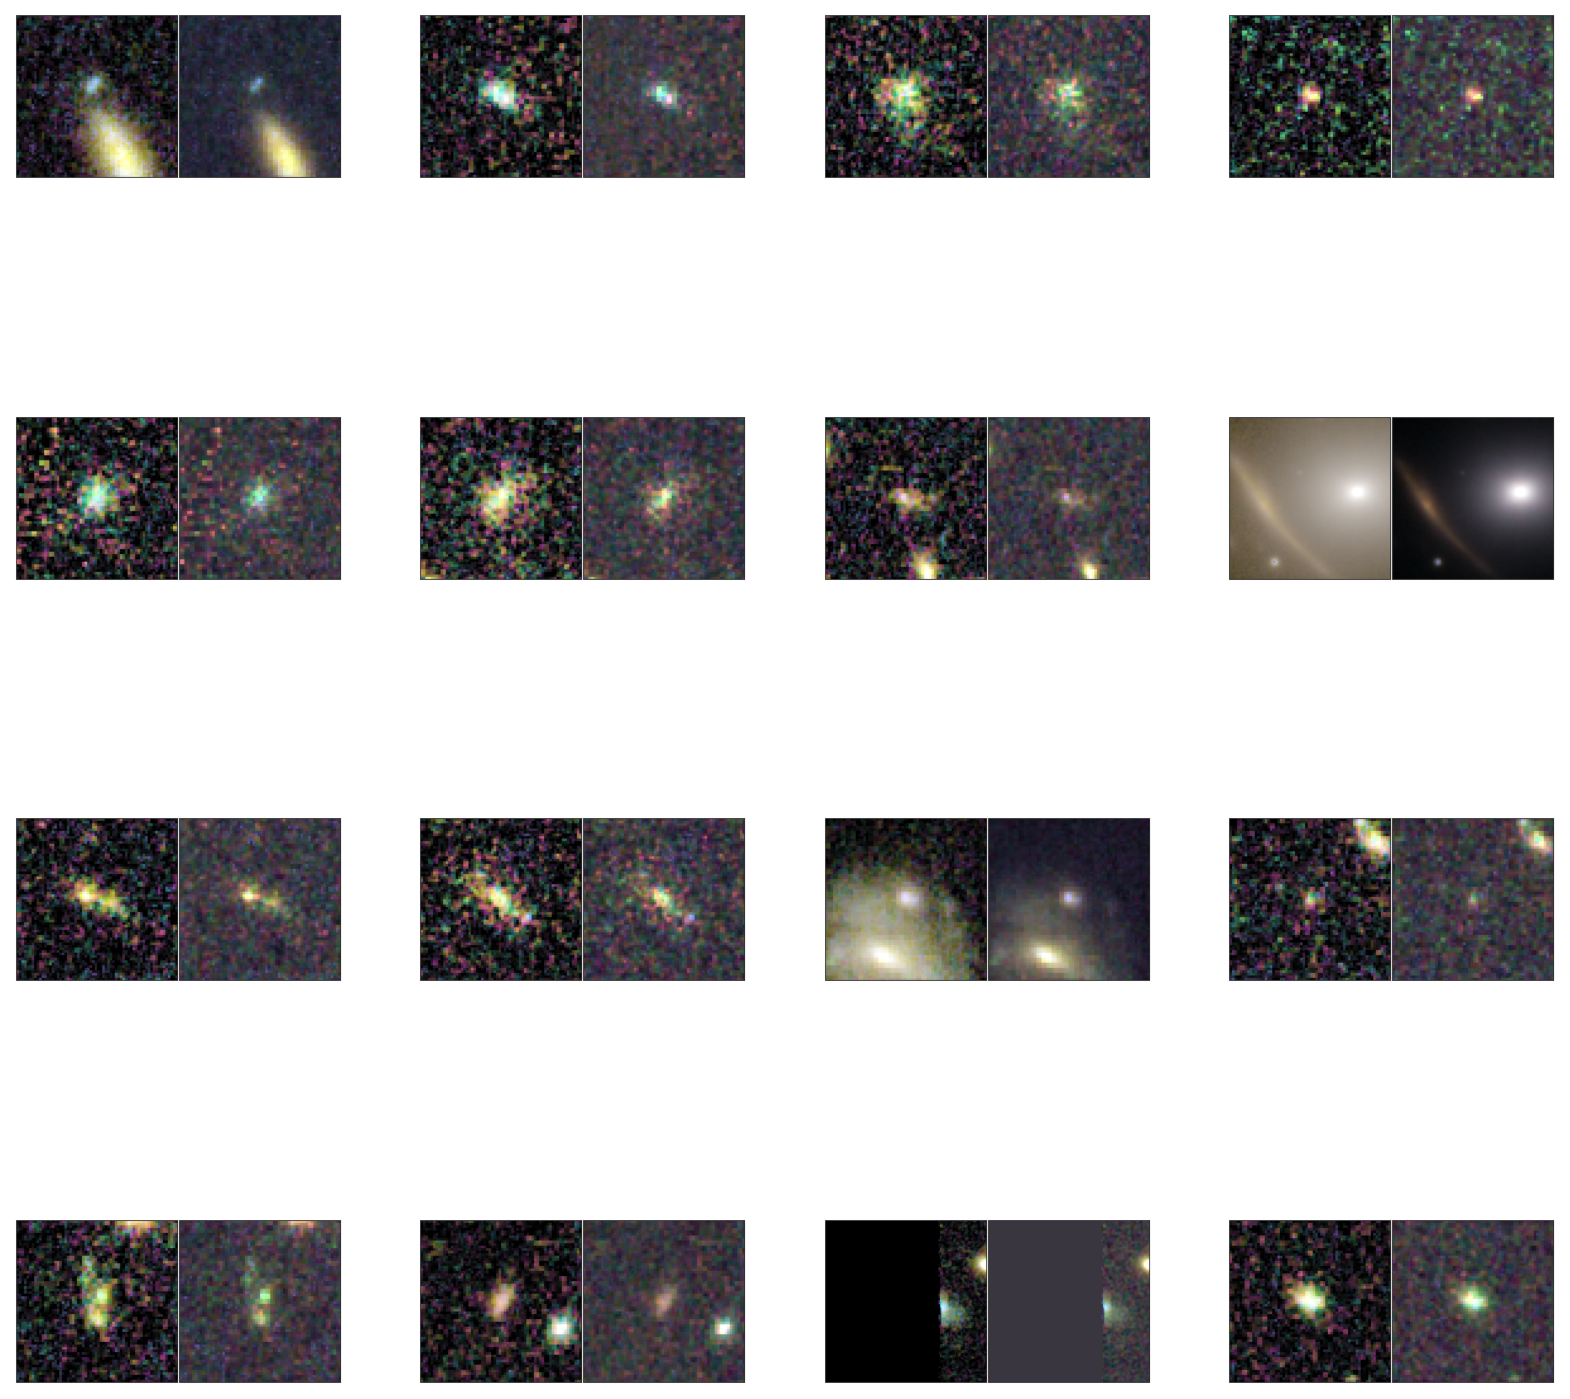

In [8]:

fig, axs = show_examples(vol[high_problem].sample(16))

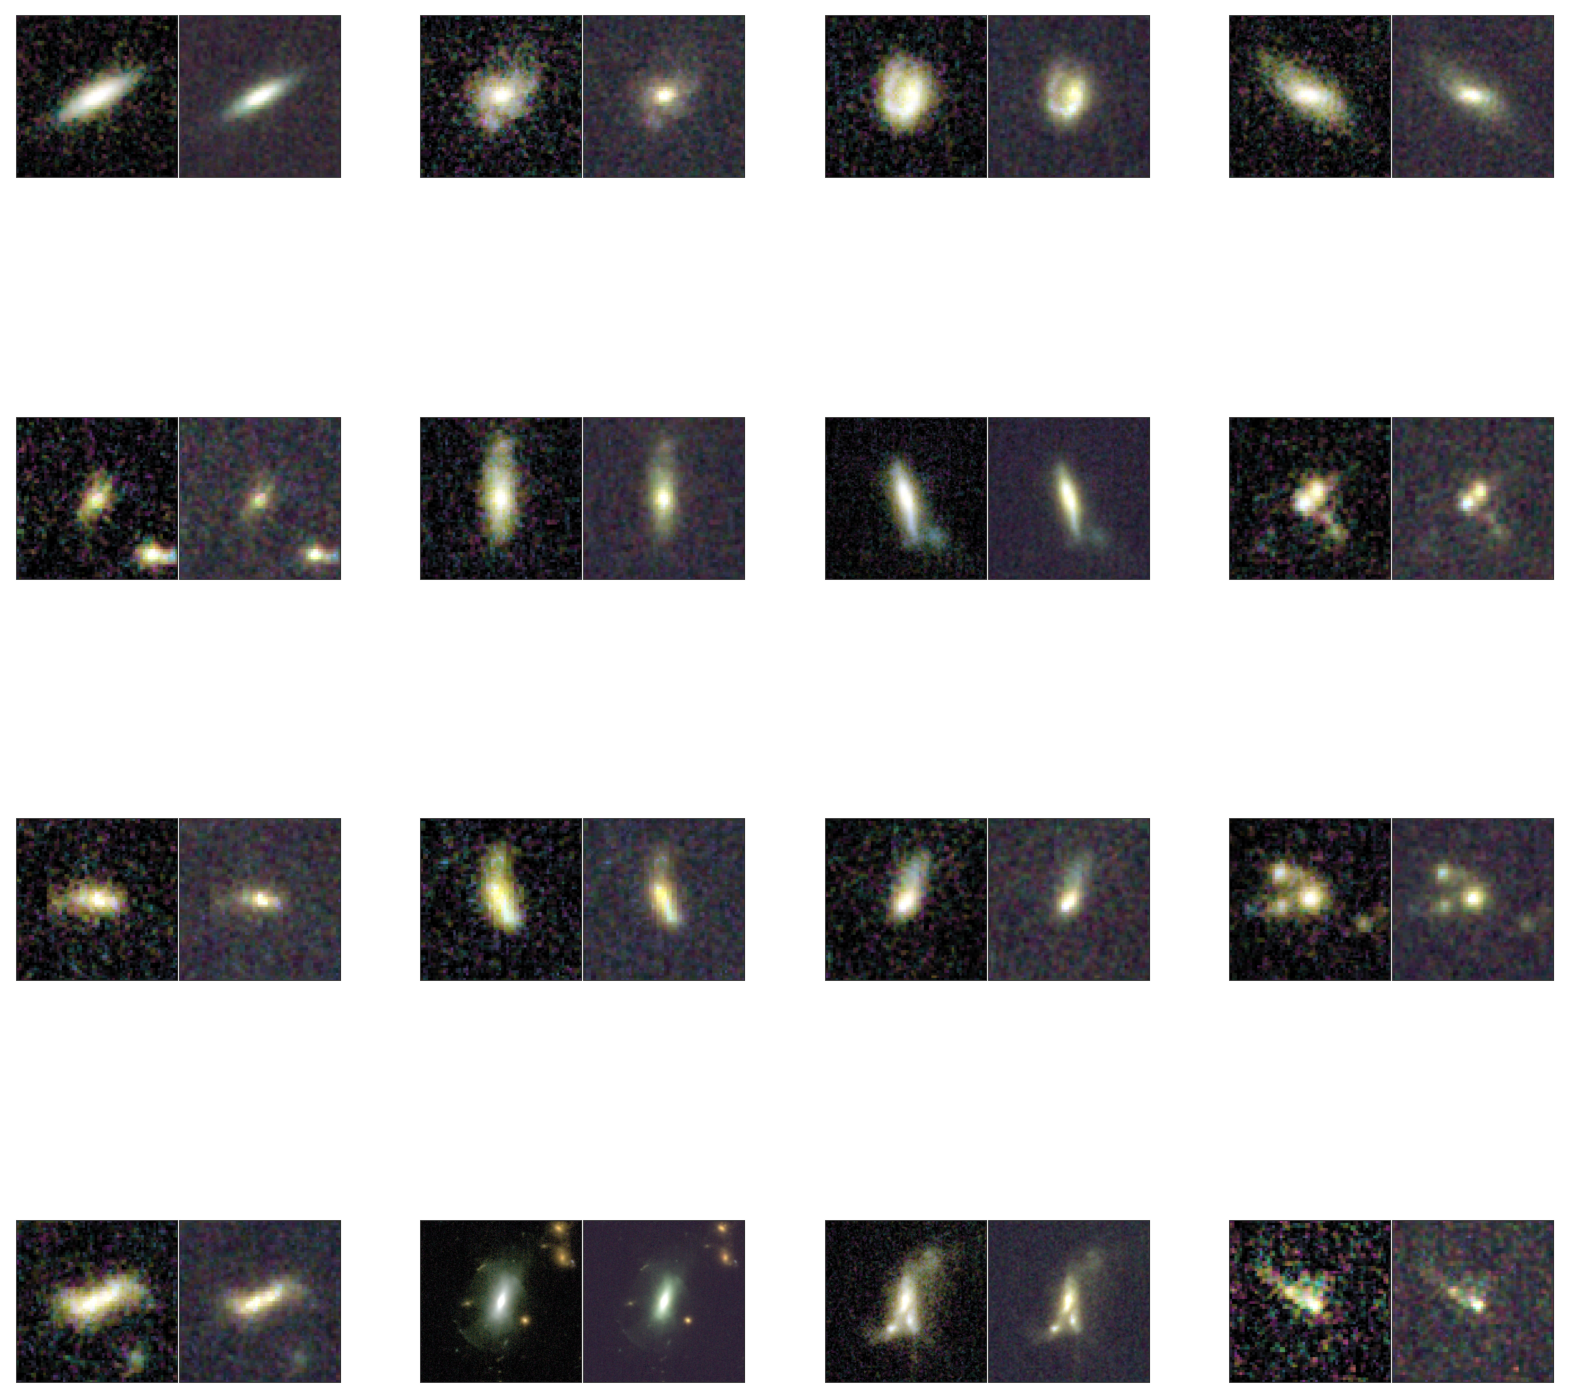

In [9]:
featured_above_0p2 = vol['smooth-or-featured_featured-or-disk_fraction'] > 0.2
fig, axs = show_examples(vol[featured_above_0p2].sample(16))


In [17]:
vol['id_str']

0       140468011
1       140468173
2       140468449
3       140469172
4       140508541
          ...    
4705    140564997
4706    140565001
4707    140565007
4708    140565008
4709    140565009
Name: id_str, Length: 4710, dtype: int64

In [21]:
metadata = pd.read_csv(
    '/home/walml/repos/gz-panoptes-reduction/notebooks/colour_cutout_master_catalogue_w_metadata.csv', 
    # usecols=['id_str', '!RA', '!Dec', 'AREA', '!radius', 'AXRATIO']),
    nrows=1000
)
metadata.iloc[0]

id_str                                                              1
fits_loc_F115W      /media/team_workspaces/Galaxy-Zoo/Data/cosmos-...
fits_loc_F150W      /media/team_workspaces/Galaxy-Zoo/Data/cosmos-...
fits_loc_F277W      /media/team_workspaces/Galaxy-Zoo/Data/cosmos-...
fits_loc_F444W      /media/team_workspaces/Galaxy-Zoo/Data/cosmos-...
field                                                              A1
RA_MODEL                                                   149.861478
DEC_MODEL                                                     2.09408
AREA                                                            271.0
MAG_MODEL_F444W                                             22.303639
AXRATIO                                                      0.131426
cutout_size                                                      64.0
success                                                             1
id_field                                                         1_A1
image1_path         

In [15]:
metadata

id_str     AREA   AXRATIO         !RA      !Dec   !radius
0        1    271.0  0.131426  149.861478  2.094080  0.000144
1        3   2108.0  0.668926  149.753374  2.138327  0.000077
2        4   1742.0  0.293251  149.804200  2.120989  0.000680
3        5  11696.0  0.589576  149.733739  2.147376  0.000668
4    65541    489.0  0.395342  149.925941  2.264551  0.000068
..     ...      ...       ...         ...       ...       ...
95     160    971.0  0.194838  149.758704  2.142107  0.000105
96     165   2343.0  0.332464  149.759739  2.141607  0.000070
97     167    188.0  0.673649  149.849241  2.109371  0.000045
98     168    215.0  0.515272  149.733553  2.151431  0.000041
99     169   1034.0  0.656332  149.805586  2.125194  0.000106

[100 rows x 6 columns]